# Mundo 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


/Users/thiagorosettimiranda/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

# Método pyplot

In [3]:
x = ["1T", "2T", "3T", "4T"]
y = [2000, 2200, 1100, 3540]

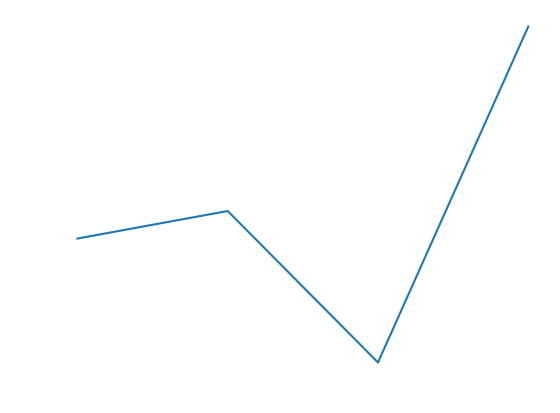

In [4]:
plt.plot(x, y)

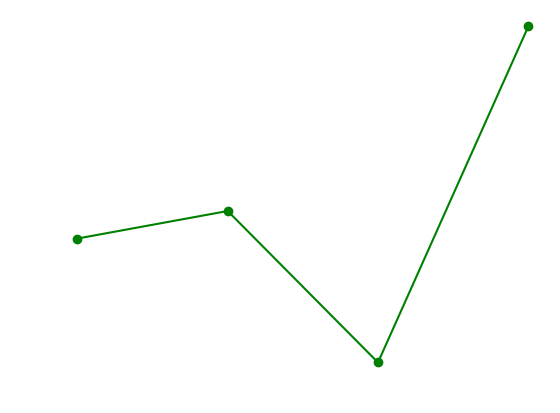

In [5]:
#vai ter uma aula sobre cada característica dessa.

plt.plot(x, y, color="green", marker='o')

#quer uma super customização? Crie gráficos como objetos. 

# Integração Pandas + Pyplot

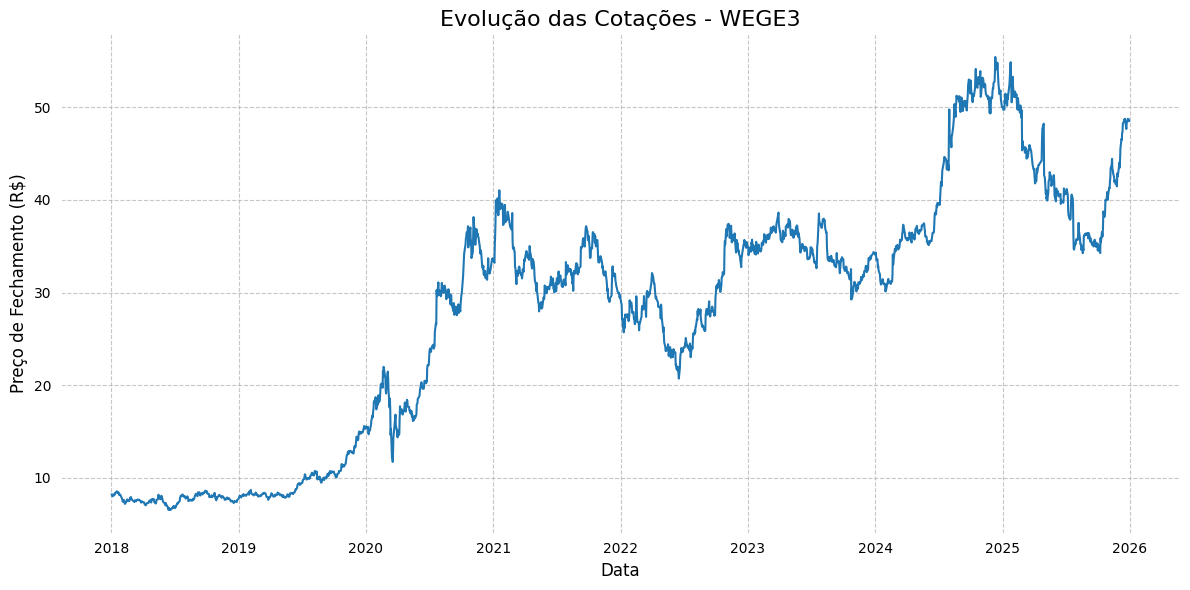

In [6]:
weg = yf.Ticker('WEGE3.SA')
history_weg = weg.history(start='2018-01-01', end='2025-12-31')['Close']

# 1. Definimos o estilo e criamos a figura
plt.figure(figsize=(12, 6)) #tamanho da figura

# 2. Plotamos os dados
plt.plot(history_weg.index, history_weg.values, label='Preço de Fechamento')

# 3. Forçando os rótulos a aparecerem (o "pulo do gato")
plt.tick_params(axis='both', which='major', labelsize=10, labelcolor='black') 

# 4. Adicionando os detalhes
plt.title('Evolução das Cotações - WEGE3', fontsize=16, color='black')
plt.xlabel('Data', fontsize=12, color='black')
plt.ylabel('Preço de Fechamento (R$)', fontsize=12, color='black')

# 5. Grade e Layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [39]:
df = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"], start='2018-01-01', end='2025-12-31')['Close']

# df = ((df.pct_change().dropna()) + 1).cumprod() - 1

df

[*********************100%***********************]  4 of 4 completed


Ticker,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2018-01-02,21.153383,4.410663,21.669315,8.220533
2018-01-03,21.422665,4.450638,21.539461,8.095680
2018-01-04,21.542339,4.458633,21.627758,8.016826
2018-01-05,21.410692,4.485284,21.965372,8.049684
2018-01-08,21.302980,4.538585,22.453608,8.115392
...,...,...,...,...
2025-12-22,13.080000,30.156794,72.919998,47.660000
2025-12-23,13.550000,30.309999,72.900002,48.279999
2025-12-26,13.650000,30.410000,73.120003,48.750000


<Figure size 1200x600 with 0 Axes>

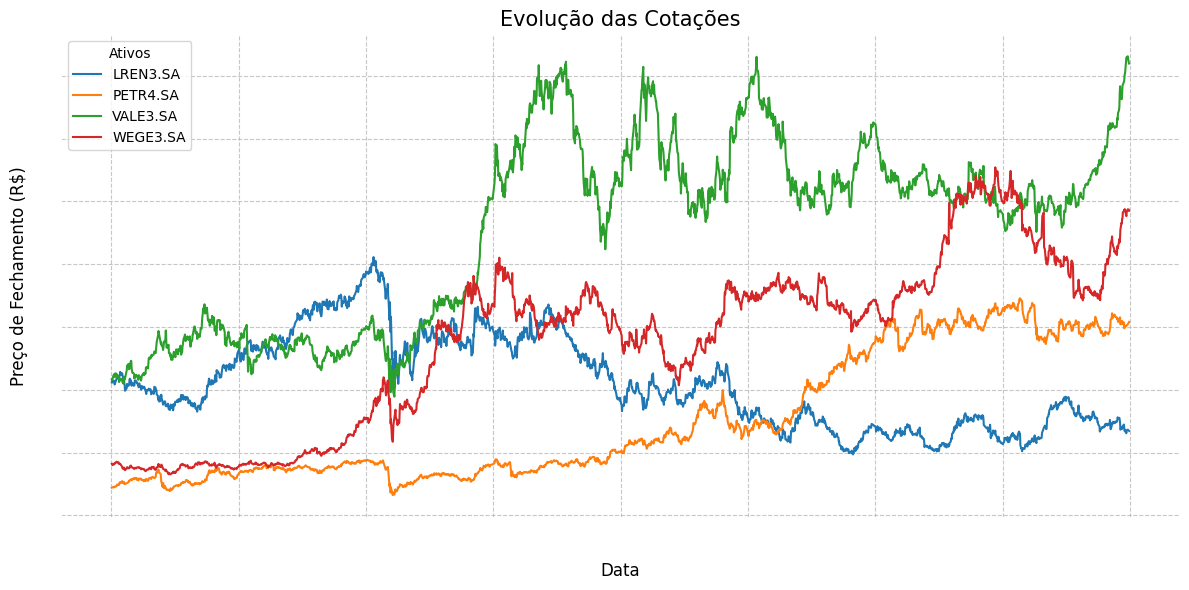

In [40]:
plt.figure(figsize=(12, 6)) #tamanho da figura

ax = df.plot(figsize=(12, 6), grid=True)

# 4. Adicionando os detalhes
plt.title('Evolução das Cotações', fontsize=15, color='black')
plt.xlabel('Data', fontsize=12, color='black')
plt.ylabel('Preço de Fechamento (R$)', fontsize=12, color='black')
plt.legend(title="Ativos")
# 5. Grade e Layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#obs: nunca faça gráficos com duas escalas. NUNCA! 

<Axes: xlabel='dias'>

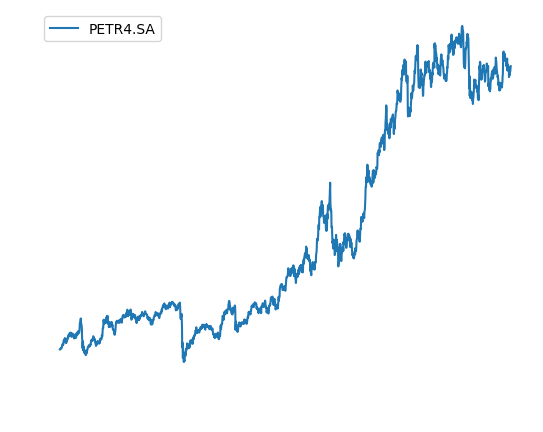

In [10]:
df_mudando_coluna = df.copy()

df_mudando_coluna['dias'] = list(range(0, len(df)))

df_mudando_coluna.plot(x = "dias", y = "PETR4.SA")

# Outros tipos de gráficos: barra, histogramas, área, dispersão, pizza...

Para criar esses outros tipos de gráficos, basta utilizar o argumento "kind" e espeficicar o gráfico.

### Gráfico de barra com a performance acumulada das ações

<Axes: xlabel='Ticker'>

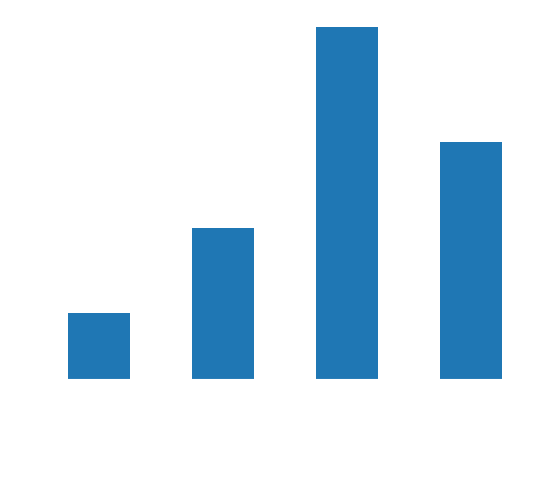

In [15]:
df.iloc[-1].plot(kind = "bar")

#brenno quero ver o eixo y em %: faça da maneira orientada a objeto. 
#Isso aqui é pra vc ver de forma rápida quando ta progrmando

### Gráfico de barra empilhado com a performance acumulada das ações ano a ano

Essa é uma ótima forma de vizualizar como os dados evoluíram ao longo do tempo. Qual % do total eles representavam antes e atualmente. É muito utilizado pra comércio internacional

/var/folders/hm/1fxn888d7lg7pk_cs5rs67ch0000gn/T/ipykernel_6846/3116224619.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_anual = df.resample("Y").last()


<Axes: >

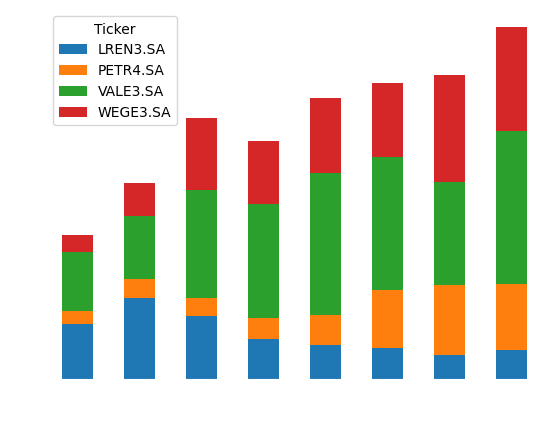

In [13]:
df_anual = df.resample("Y").last()

df_anual.index = [2016,2017, 2018, 2019, 2020, 2021, 2022, 2023]

df_anual.plot.bar(stacked = True)

<Axes: >

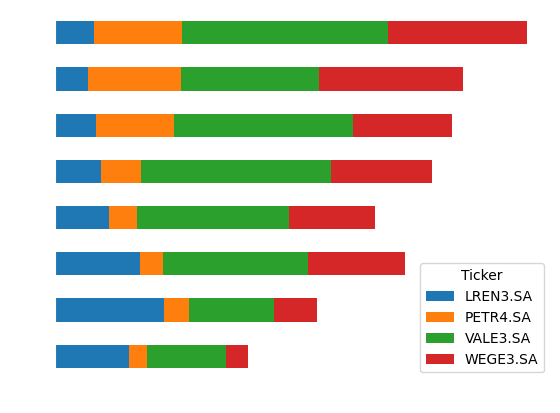

In [14]:
#horizontal

df_anual.plot.barh(stacked = True)

# Gráfico de área

Uma outra forma de visualizar isso são com gráficos de área.

In [31]:
qtd_acoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"], start='2018-01-01', end='2025-12-31')['Volume']
preco_original = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"], start='2018-01-01', end='2025-12-31')['Close']

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


In [32]:
volume = qtd_acoes * preco_original
volume

Ticker,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2018-01-02,6.452116e+07,1.475887e+08,3.067617e+08,3.956428e+07
2018-01-03,5.981274e+07,2.489727e+08,2.745032e+08,3.766888e+07
2018-01-04,6.897917e+07,1.652588e+08,3.986645e+08,2.659662e+07
2018-01-05,6.478606e+07,1.209152e+08,3.350005e+08,2.054827e+07
2018-01-08,8.540669e+07,1.288958e+08,3.265383e+08,2.715572e+07
...,...,...,...,...
2025-12-22,1.995276e+08,1.082535e+09,2.031041e+09,3.046284e+08
2025-12-23,2.068624e+08,1.082185e+09,1.249572e+09,2.359009e+08
2025-12-26,9.169387e+07,6.136312e+08,1.196887e+09,8.917838e+07


In [33]:
volume = volume.dropna().resample("ME").mean()

<Axes: xlabel='Date'>

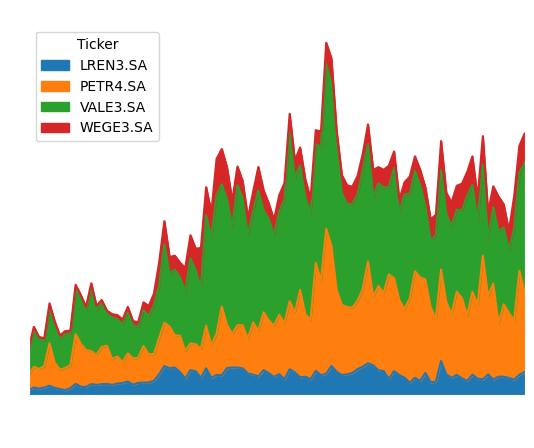

In [34]:
volume.plot.area()

### Histograma de retornos diários

[*********************100%***********************]  1 of 1 completed


<Axes: ylabel='Frequency'>

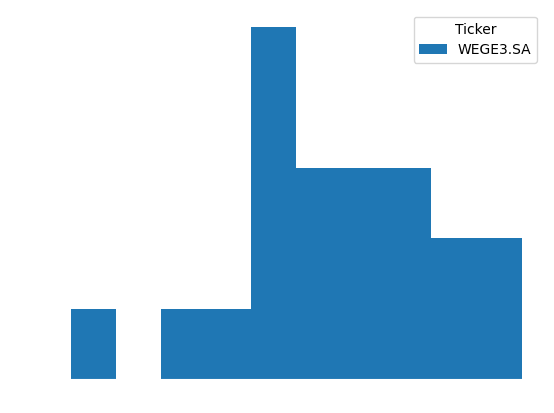

In [37]:
cotacoes = yf.download("WEGE3.SA")['Close']

retornos_diarios = cotacoes.pct_change().dropna()

retornos_diarios.plot.hist()

<Axes: ylabel='Frequency'>

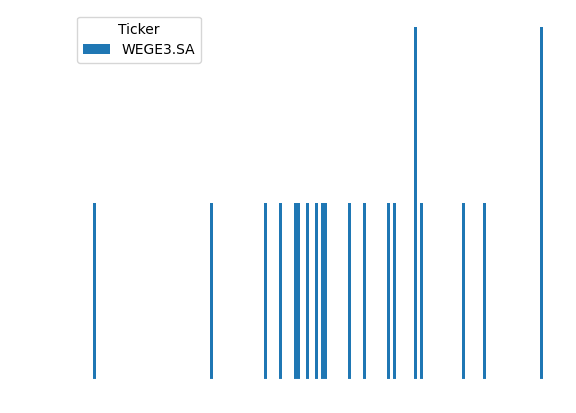

In [23]:
retornos_diarios.plot.hist(bins=150)

# Boxsplot

Graças a Deus você não está na faculdade e não precisa fazer essa merda na mão.

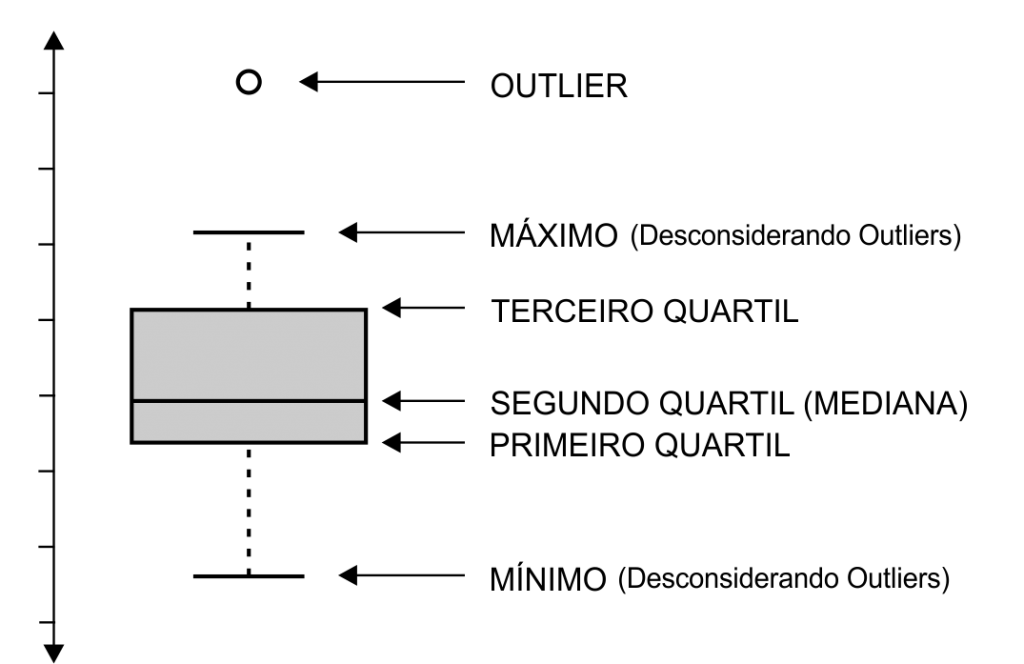

[*********************100%***********************]  4 of 4 completed
/var/folders/hm/1fxn888d7lg7pk_cs5rs67ch0000gn/T/ipykernel_6846/3091106809.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()


<Axes: >

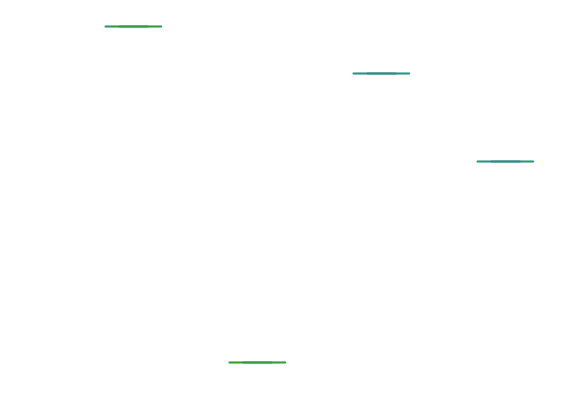

In [25]:
cotacoes = yf.download(["WEGE3.SA", "PETR4.SA", "VALE3.SA", "LREN3.SA"])['Close']

retornos_mensais = cotacoes.resample("M").last().pct_change().dropna()

retornos_mensais.plot.box()

# Gráfico de dispersão

Retornos Ibov x Dólar em cada ano

In [26]:
cotacoes = yf.download(["^BVSP", "USDBRL=X"])['Close']

cotacoes = cotacoes.resample("Y").last().pct_change().dropna()

cotacoes['ano'] = cotacoes.index.year
cotacoes['ano'] = cotacoes['ano'].astype("category")

cotacoes.columns = ["Ibovespa", "Dólar", "Ano"]

cotacoes

[*********************100%***********************]  2 of 2 completed
/var/folders/hm/1fxn888d7lg7pk_cs5rs67ch0000gn/T/ipykernel_6846/1844619507.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  cotacoes = cotacoes.resample("Y").last().pct_change().dropna()


,Ibovespa,Dólar,Ano
Date,,,


ValueError: You must provide at least 2 boundaries (1 region) but you passed in array([0.])

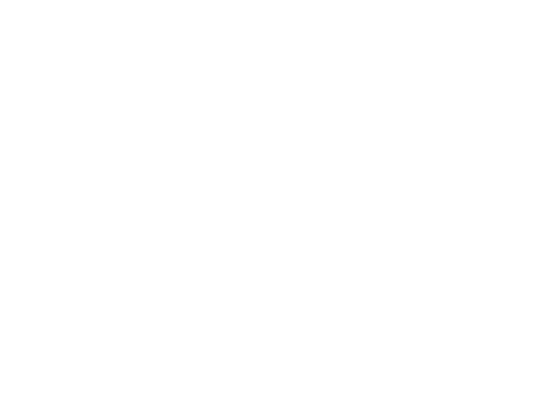

In [ ]:
cotacoes.plot.scatter(x = "Dólar", y = "Ibovespa", c = "Ano",  cmap = "viridis")

# Exercícios

* Exercício 89: Mande o usuário digitar o código de 3 empresas da bolsa. Devolva pra ele:

        - Um gráfico de linha com a trajetória das cotações das empresas.
        - Um gráfico de área com o volume de cada ação.
        - Um gráfico boxsplot com os retornos mensais de cada ação.
        - Três gráficos de dispersão entre as ações e o ibovespa pra cada ano. 

[*********************100%***********************]  4 of 4 completed
/var/folders/hm/1fxn888d7lg7pk_cs5rs67ch0000gn/T/ipykernel_6773/1869563579.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retorno_anual_ibov = ibovespa.resample("Y").last().pct_change().dropna()
/var/folders/hm/1fxn888d7lg7pk_cs5rs67ch0000gn/T/ipykernel_6773/1869563579.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  volume = volume.resample("M").last()
/var/folders/hm/1fxn888d7lg7pk_cs5rs67ch0000gn/T/ipykernel_6773/1869563579.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  retornos_mensais = cotacoes_empresas.resample("M").last().pct_change().dropna()
/var/folders/hm/1fxn888d7lg7pk_cs5rs67ch0000gn/T/ipykernel_6773/1869563579.py:35: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  retornos_

ValueError: You must provide at least 2 boundaries (1 region) but you passed in array([0.])

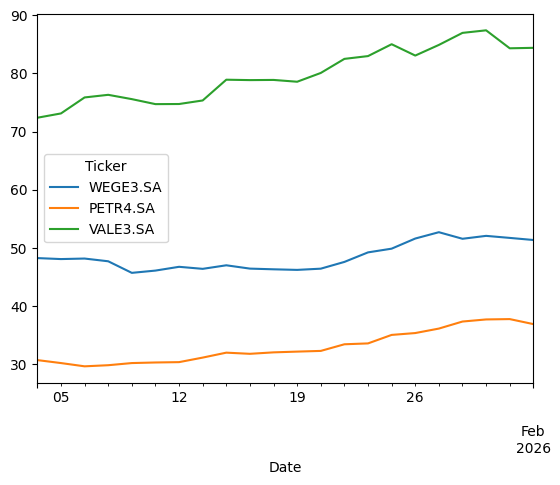

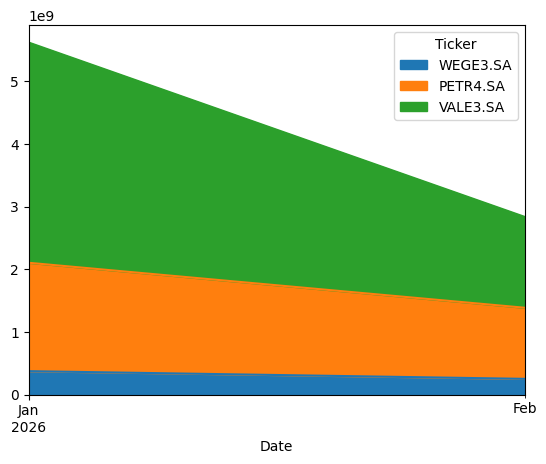

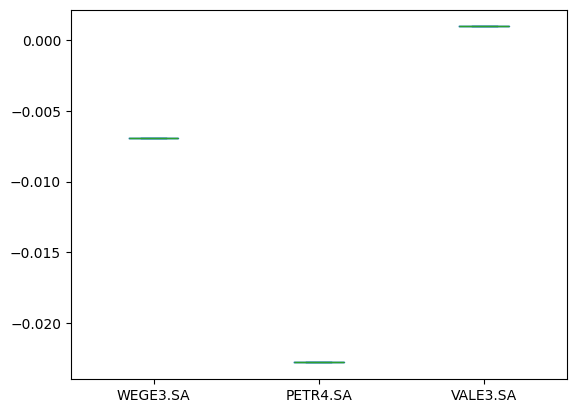

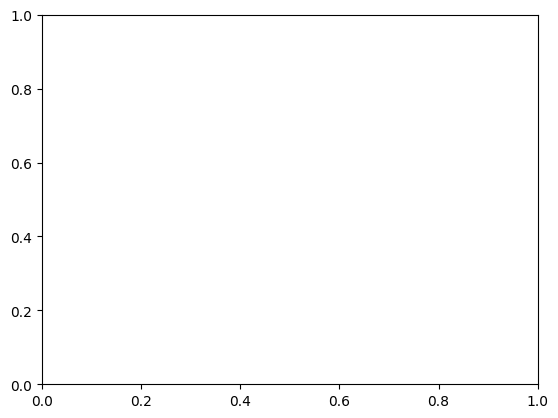

In [12]:
#gabarito 89

acao1 = str(input("Escolha a 1º ação: "))
acao2 = str(input("Escolha a 2º ação: "))
acao3 = str(input("Escolha a 3º ação: "))

lista_acoes = [acao1, acao2, acao3]

lista_acoes = [acao + ".SA" for acao in lista_acoes]

lista_acoes.append("^BVSP")

base_dados = yf.download(lista_acoes)

base_dados = base_dados.dropna()

lista_acoes.remove("^BVSP")

ibovespa = base_dados['Close']['^BVSP']

retorno_anual_ibov = ibovespa.resample("Y").last().pct_change().dropna()

cotacoes_empresas = base_dados['Close'][lista_acoes]

cotacoes_empresas_original = base_dados['Close'][lista_acoes]

qtd_acoes = base_dados['Volume'][lista_acoes]

volume = cotacoes_empresas_original * qtd_acoes

volume = volume.resample("M").last()

retornos_mensais = cotacoes_empresas.resample("M").last().pct_change().dropna()

retornos_anual = cotacoes_empresas.resample("Y").last().pct_change().dropna()

cotacoes_empresas.plot()

volume.plot.area()

retornos_mensais.plot.box()

for acao in lista_acoes:
    
    df = pd.DataFrame({acao: retornos_anual[acao],
                      'Ibovespa': retorno_anual_ibov}, index = retorno_anual_ibov.index)
    
    df['Ano'] = df.index.year
    df['Ano'] = df['Ano'].astype("category")
    
    df.plot.scatter(x = acao, y = "Ibovespa", c = "Ano",  cmap = "viridis")
                     
    
    